<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [92]:
# Librerias necesarias todas las misiones

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import anderson
from statsmodels.formula.api import ols
import ipywidgets as widgets
import plotly.graph_objects as go
import csv
import association_metrics as am

In [93]:
#Importar las bases de datos
datos20191 = pd.read_csv("Archivos/SB11_20191.txt",sep="¬")
datos20192 = pd.read_csv("Archivos/SB11_20192.txt",sep="¬")
datos20201 = pd.read_csv("Archivos/SB11_20201.txt",sep="¬")
datos20202 = pd.read_csv("Archivos/SB11_20202.txt",sep="¬")
datos20211 = pd.read_csv("Archivos/SB11_20211.txt",sep="¬")


#Partición aleatoria de las bases de datos

datos20191=datos20191.sample(frac=0.05,random_state=18)
datos20192=datos20192.sample(frac=0.05,random_state=18)
datos20201=datos20201.sample(frac=0.05,random_state=18)
datos20202=datos20202.sample(frac=0.05,random_state=18)
datos20211=datos20211.sample(frac=0.05,random_state=18)

#Exportar a csv

datos20191.to_csv('datos20191.txt',sep=";",
                 quoting=csv.QUOTE_NONE, escapechar=" ")
datos20192.to_csv('datos20192.txt',sep=";",
                 quoting=csv.QUOTE_NONE, escapechar=" ")
datos20201.to_csv('datos20201.txt',sep=";",
                 quoting=csv.QUOTE_NONE, escapechar=" ")
datos20202.to_csv('datos20202.txt',sep=";",
                 quoting=csv.QUOTE_NONE, escapechar=" ")
datos20211.to_csv('datos20211.txt',sep=";",
                 quoting=csv.QUOTE_NONE, escapechar=" ")


<ipython-input-93-4a6b1a9c69bd>:2: ParserWarning:

Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.

<ipython-input-93-4a6b1a9c69bd>:3: ParserWarning:

Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.

<ipython-input-93-4a6b1a9c69bd>:4: ParserWarning:

Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.

<ipython-input-93-4a6b1a9c69bd>:5: ParserWarning:

Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by speci

### Comentario del autor

#### Respecto al cargue de la información

Dado que en Github no se permite el cargue de archivos de más de 25 MB, fue necesario tomar una muestra aleatoria del 5% de cada base para poder realizar dicho cargue. Se realizo en todas las bases, a pesar que las bases 20191, 20201 y 20211 si cumplian las caracteristicas, esto para que se guarden las proporciones entre cada periodo.

Para facilitar la calificación se puede correr la información apartir de la siguiente linea de codigo, tomando los archivos cargados en GitHub

In [94]:
datos20191 = pd.read_csv("datos20191.txt",sep=";")
datos20192 = pd.read_csv("datos20192.txt",sep=";")
datos20201 = pd.read_csv("datos20201.txt",sep=";")
datos20202 = pd.read_csv("datos20202.txt",sep=";")
datos20211 = pd.read_csv("datos20211.txt",sep=";")

In [95]:
#Analisis de informacion por columnas
columns_names20191 = datos20191.columns.values
columns_names20192 = datos20192.columns.values
columns_names20201 = datos20201.columns.values
columns_names20202 = datos20202.columns.values
columns_names20211 = datos20211.columns.values

print("El número de columnas para la base del periodo 20191 es "+str(len(columns_names20191)))
print("El número de columnas para la base del periodo 20192 es "+str(len(columns_names20192)))
print("El número de columnas para la base del periodo 20201 es "+str(len(columns_names20201)))
print("El número de columnas para la base del periodo 20202 es "+str(len(columns_names20202)))
print("El número de columnas para la base del periodo 20211 es "+str(len(columns_names20211)))

El número de columnas para la base del periodo 20191 es 83
El número de columnas para la base del periodo 20192 es 83
El número de columnas para la base del periodo 20201 es 82
El número de columnas para la base del periodo 20202 es 82
El número de columnas para la base del periodo 20211 es 79


### Comentario del autor

#### Respecto al número de columnas observadas

Como se observa en la línea anterior, se evidencia que hay diferentes número de columnas en los distintos periodos. Se identifico lo siguiente:

-Todas las bases salvo la de 20211 contienen las variables 

ESTU_ESTADOINVESTIGACION  
ESTU_INSE_INDIVIDUAL   
ESTU_NSE_INDIVIDUAL    
ESTU_NSE_ESTABLECIMIENTO   
ESTU_GENERACION-E

-Solo las bases de 20191 y 20192 contienen la variable ESTU_ETNIA

-Solo la base de 20211 contiene la variable PERCENTIL_ESPECIAL_GLOBAL


In [96]:
#Indagación sobre las 77 columnas en comun

#Varibles categoricas
print(datos20202['ESTU_NACIONALIDAD'].value_counts())

#Variables cuantitativas
print("La media del puntaje total obtenido en la prueba para 20202 es de "+str(datos20202['PUNT_GLOBAL'].mean()))



COLOMBIA           25088
VENEZUELA            142
ESTADOS  UNIDOS        4
ESPAÑA                 3
VANUATU                2
MÉXICO                 1
ARGENTINA              1
GUATEMALA              1
ECUADOR                1
REINO  UNIDO           1
Name: ESTU_NACIONALIDAD, dtype: int64
La media del puntaje total obtenido en la prueba para 20202 es de 248.4312311836476


### Comentario del autor

#### Respecto al número de columnas seleccionadas

Con la línea de codigo que se observa anteriormente, se analiza la información que contiene cada una de las 77 columnas que tienen en comun los periodos seleccionados y finalmente se propone usar para el analisis 12 variables. Uno de los criterios más relevantes que se tuvieron en cuenta, es que dentro de los niveles que contienen cada columna o varible haya una distribución adecuada de los registros, es decir que no exista una acumulación importante dentro de algun nivel que tergiverse los resultados. A modo de ejemplo, en la linea anterior se muestra la variable ESTU_NACIONALIDAD, la cual muestra una acumulación de información dentro del nivel COLOMBIA. Adicionalmente, puesto que la variable de interes es el resultado global, los resultados por materia no se tendran en cuenta en el analisis.

|<center>Nombre Variable Seleccionada</center>|<center>Descripción</center>|
|:-:|:-|
|ESTU_GENERO|Género del estudiante|
|PERIODO|Periodo de analisis |
|ESTU_TIENEETNIA|Variable dicotomica que determina si el estudiante pertenece o no a una etnia|
|ESTU_DEPTO_RESIDE|Departamento de residencia del estudiante|
|FAMI_ESTRATOVIVIENDA|Estrato socioeconomico de la famila del estudiante |
|FAMI_TIENEINTERNET|Variable dicotomica que determina si la familia del estudiante tiene o no acceso a internet|
|ESTU_HORASSEMANATRABAJA|Indica un rango del número de horas que el estudiante dedica a laborar |
|COLE_NATURALEZA|Indica si el colegio es oficial o no oficial |
|COLE_AREA_UBICACION|Indica si el colegio esta ubicado en zona rural o urbana|
|COLE_JORNADA|Jornada de estudio del colegio|
|PUNT_GLOBAL|Puntaje global obtenido en la prueba |
|PERCENTIL_GLOBAL|Percentil ocupado en la prueba|




In [98]:
#Seleccionar columnas elegidas y concatenar base de datos

datoscol20191=datos20191.loc[:,['ESTU_GENERO','PERIODO','ESTU_TIENEETNIA','ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
                'FAMI_TIENEINTERNET', 'ESTU_HORASSEMANATRABAJA', 'COLE_NATURALEZA','COLE_AREA_UBICACION', 
                 'COLE_JORNADA', 'PUNT_GLOBAL','PERCENTIL_GLOBAL' ]]
datoscol20192=datos20192.loc[:,['ESTU_GENERO','PERIODO','ESTU_TIENEETNIA','ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
                'FAMI_TIENEINTERNET', 'ESTU_HORASSEMANATRABAJA', 'COLE_NATURALEZA','COLE_AREA_UBICACION', 
                 'COLE_JORNADA', 'PUNT_GLOBAL','PERCENTIL_GLOBAL' ]]
datoscol20201=datos20201.loc[:,['ESTU_GENERO','PERIODO','ESTU_TIENEETNIA','ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
                'FAMI_TIENEINTERNET', 'ESTU_HORASSEMANATRABAJA', 'COLE_NATURALEZA','COLE_AREA_UBICACION', 
                 'COLE_JORNADA', 'PUNT_GLOBAL','PERCENTIL_GLOBAL' ]]
datoscol20202=datos20202.loc[:,['ESTU_GENERO','PERIODO','ESTU_TIENEETNIA','ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
                'FAMI_TIENEINTERNET', 'ESTU_HORASSEMANATRABAJA', 'COLE_NATURALEZA','COLE_AREA_UBICACION', 
                 'COLE_JORNADA', 'PUNT_GLOBAL','PERCENTIL_GLOBAL' ]]
datoscol20211=datos20211.loc[:,['ESTU_GENERO','PERIODO','ESTU_TIENEETNIA','ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
                'FAMI_TIENEINTERNET', 'ESTU_HORASSEMANATRABAJA', 'COLE_NATURALEZA','COLE_AREA_UBICACION', 
                 'COLE_JORNADA', 'PUNT_GLOBAL','PERCENTIL_GLOBAL' ]]

datoscol=pd.concat([datoscol20191,datoscol20192,datoscol20201,datoscol20202,datoscol20211])
datoscol.index=range(datoscol.shape[0])
datoscol.shape

(55157, 12)

In [99]:
#Conteo de datos faltantes
missing_values_count = datoscol.isnull().sum()
print("La cantidad de datos faltantes por columna es ")
print(missing_values_count)
total_registros=datoscol.shape[0]
porcentaje_missing_columna=missing_values_count/total_registros
print("El porcentaje de datos faltantes por columna es ")
print(round(porcentaje_missing_columna*100,2))


La cantidad de datos faltantes por columna es 
ESTU_GENERO                   8
PERIODO                       0
ESTU_TIENEETNIA             297
ESTU_DEPTO_RESIDE            63
FAMI_ESTRATOVIVIENDA       2767
FAMI_TIENEINTERNET         2406
ESTU_HORASSEMANATRABAJA    1799
COLE_NATURALEZA               0
COLE_AREA_UBICACION           0
COLE_JORNADA                  0
PUNT_GLOBAL                   0
PERCENTIL_GLOBAL              5
dtype: int64
El porcentaje de datos faltantes por columna es 
ESTU_GENERO                0.01
PERIODO                    0.00
ESTU_TIENEETNIA            0.54
ESTU_DEPTO_RESIDE          0.11
FAMI_ESTRATOVIVIENDA       5.02
FAMI_TIENEINTERNET         4.36
ESTU_HORASSEMANATRABAJA    3.26
COLE_NATURALEZA            0.00
COLE_AREA_UBICACION        0.00
COLE_JORNADA               0.00
PUNT_GLOBAL                0.00
PERCENTIL_GLOBAL           0.01
dtype: float64


In [100]:
#Tratamiento datos faltantes

datoscolfin = datoscol.fillna(axis = 0, method = "ffill")
missing_values_count = datoscolfin.isnull().sum()
missing_values_count

ESTU_GENERO                0
PERIODO                    0
ESTU_TIENEETNIA            0
ESTU_DEPTO_RESIDE          0
FAMI_ESTRATOVIVIENDA       0
FAMI_TIENEINTERNET         0
ESTU_HORASSEMANATRABAJA    0
COLE_NATURALEZA            0
COLE_AREA_UBICACION        0
COLE_JORNADA               0
PUNT_GLOBAL                0
PERCENTIL_GLOBAL           0
dtype: int64

In [101]:
#Tipos de variables en cada columna
datoscolfin.dtypes

ESTU_GENERO                 object
PERIODO                      int64
ESTU_TIENEETNIA             object
ESTU_DEPTO_RESIDE           object
FAMI_ESTRATOVIVIENDA        object
FAMI_TIENEINTERNET          object
ESTU_HORASSEMANATRABAJA     object
COLE_NATURALEZA             object
COLE_AREA_UBICACION         object
COLE_JORNADA                object
PUNT_GLOBAL                  int64
PERCENTIL_GLOBAL           float64
dtype: object

In [102]:
#Como se observa en la linea de codigo anterior, todas las variables
#seleccionadas son de tipo object, sin embargo las posibles variables
#respuesta deben ser modificadas a tipo float

datoscolfin['PUNT_GLOBAL'] = datoscolfin['PUNT_GLOBAL'].astype('float64')
datoscolfin['PERCENTIL_GLOBAL'] = datoscolfin['PERCENTIL_GLOBAL'].astype('float64')
datoscolfin['PERIODO'] = datoscolfin['PERIODO'].astype('object')
#Se encontro que en Departamente se desagregaban dos categorias BOGOTÁ y BOGOTA
datoscolfin['ESTU_DEPTO_RESIDE'] = datoscolfin['ESTU_DEPTO_RESIDE'].replace(['BOGOTÁ'], 'BOGOTA')
print(datoscolfin.dtypes)
print(datoscolfin.shape)

ESTU_GENERO                 object
PERIODO                     object
ESTU_TIENEETNIA             object
ESTU_DEPTO_RESIDE           object
FAMI_ESTRATOVIVIENDA        object
FAMI_TIENEINTERNET          object
ESTU_HORASSEMANATRABAJA     object
COLE_NATURALEZA             object
COLE_AREA_UBICACION         object
COLE_JORNADA                object
PUNT_GLOBAL                float64
PERCENTIL_GLOBAL           float64
dtype: object
(55157, 12)


### Comentario del autor

#### Respuesta preguntas guía

##### ¿Qué dimensiones tienen los datos?

Originalmente se contaba con 5 dataframe, con un máximo de 82 columnas para 20191 y un minimo de 78 para 20211. La suma de los registros de estas 5 bases es de 1.103.130, sin embargo como se menciono inicialmente por temas de cargue en Github se tomo una muestra del 5% de cada base. Después del analisis de la información, limpieza de columnas y de datos faltantes obtenemos un unico DataFrame con 12 columnas y 55.157 filas.

##### ¿Con cuántos años y periodos de evaluación se cuenta?

Con 5 periodos: 20191, 20192, 20201, 20202 y 20211

##### ¿Cuáles variables pueden ser de interés para la problemática planteada?

Como se menciona y se describen anteriormente, se seleccionan 12 variables para dar respuesta a la problema planteada.

##### ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Como se muestra en el desarrollo de la mision 1, la columna con más datos atipicos es el estrato socioeconomico con un 5,02% de la información faltante en esta columna, los datos faltante se trataron con el metodo `'fillna'` para evitar eliminar columnas.

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

,count,mean,std,min,25%,50%,75%,max
ESTU_GENERO,,,,,,,,
F,29982.0,245.721166,50.240787,29.0,208.0,242.0,280.0,470.0
M,25175.0,253.445760,52.626797,0.0,214.0,251.0,290.0,491.0


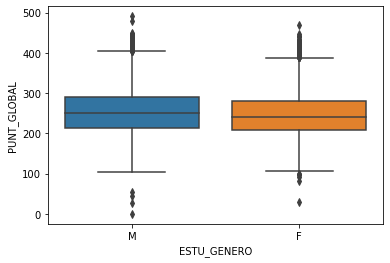

In [104]:
# Analisis Genero
box_genero = sns.boxplot(x="ESTU_GENERO", y="PUNT_GLOBAL", data=datoscolfin)
datoscolfin.groupby(['ESTU_GENERO'])['PUNT_GLOBAL'].describe()


#### Comentario del autor: Genero

Como se muestra en el resumen de estadisticas y gráficamente, aparentemente no hay una gran diferencia en el resultado obtenido en las pruebas entre hombres y mujeres, aunque hay una leve tendencia de que los hombres tiene un resultado mejor.

,count,mean,std,min,25%,50%,75%,max
PERIODO,,,,,,,,
20191,1054.0,280.771347,65.678097,141.0,228.00,283.0,337.0,442.0
20194,27311.0,246.117682,51.455185,44.0,207.00,243.0,282.0,448.0
20201,772.0,288.208549,60.367502,133.0,241.00,297.0,337.0,450.0
20204,25244.0,248.431231,48.454358,0.0,212.00,245.0,282.0,491.0
20211,776.0,304.331186,56.005551,141.0,266.75,312.0,346.0,479.0


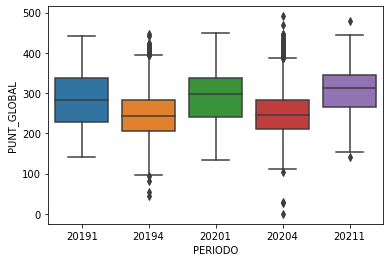

In [105]:
#Analisis Periodo
boxetnia = sns.boxplot(x="PERIODO", y="PUNT_GLOBAL", data=datoscolfin)
datoscolfin.groupby(['PERIODO'])['PUNT_GLOBAL'].describe()

#### Comentario del autor: Periodo

Como se muestra en el resumen de estadisticas y gráficamente, aparentemente hay diferencia en el desempeño de los estudiantes que se presentan en el primer semestre del año respecto a los que presentan la prueba en el segundo semestre del año. Dado este hallazgo en la siguiente linea de codigo se incluirá una columna que identifique si la prueba se presentó en el primer o en el segundo semestre del año.

In [106]:
datoscolfin.loc[datoscolfin.PERIODO==20191,'PERIODO']='1'
datoscolfin.loc[datoscolfin.PERIODO==20194,'PERIODO']='2'
datoscolfin.loc[datoscolfin.PERIODO==20201,'PERIODO']='1'
datoscolfin.loc[datoscolfin.PERIODO==20204,'PERIODO']='2'
datoscolfin.loc[datoscolfin.PERIODO==20211,'PERIODO']='1'

,count,mean,std,min,25%,50%,75%,max
ESTU_TIENEETNIA,,,,,,,,
No,51514.0,251.527177,51.194318,0.0,213.0,248.0,287.0,491.0
Si,3643.0,217.001921,44.308709,123.0,183.0,210.0,245.0,391.0


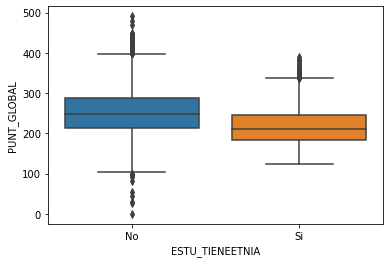

In [107]:
# Analisis Etnia
boxetnia = sns.boxplot(x="ESTU_TIENEETNIA", y="PUNT_GLOBAL", data=datoscolfin)
datoscolfin.groupby(['ESTU_TIENEETNIA'])['PUNT_GLOBAL'].describe()

#### Comentario del autor: Etnia

Como se muestra en el resumen de estadisticas y gráficamente, aparentemente hay diferencia en el resultado obtenido en las pruebas entre las personas que pertenecen a una etnia o no.

,count,mean,std,min,25%,50%,75%,max
ESTU_DEPTO_RESIDE,,,,,,,,
BOGOTA,8639.0,269.639773,50.015644,29.0,233.00,268.0,304.00,479.0
SANTANDER,2505.0,265.290619,51.673420,111.0,227.00,264.0,301.00,470.0
BOYACA,1595.0,260.490909,46.185368,147.0,227.00,260.0,293.00,412.0
CUNDINAMARCA,3668.0,256.112323,47.263847,132.0,222.00,255.0,288.00,425.0
NORTE SANTANDER,1575.0,254.593651,48.789046,143.0,219.00,251.0,288.00,431.0
QUINDIO,611.0,254.211129,52.089673,143.0,213.00,252.0,290.00,448.0
VALLE,4823.0,253.885756,51.772770,108.0,215.00,252.0,290.00,450.0
RISARALDA,1067.0,252.555764,48.976154,28.0,220.00,251.0,285.00,442.0
HUILA,1271.0,250.326515,50.193056,137.0,212.00,248.0,286.00,410.0


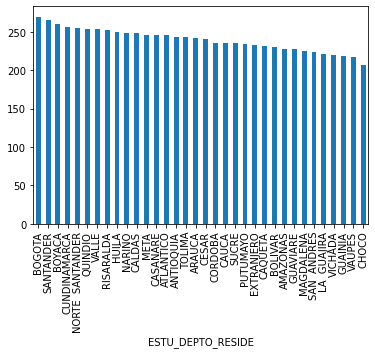

In [108]:
# Analisis Departamento

esta_depa=datoscolfin.groupby(['ESTU_DEPTO_RESIDE'])['PUNT_GLOBAL'].describe()
esta_depa=esta_depa.sort_values('mean', ascending=False)

esta_depa['mean'].plot(kind='bar')
esta_depa

#### Comentario del autor: Departamento

Como se muestra en el resumen de estadisticas y gráficamente, aparentemente hay diferencia en el resultado obtenido en las pruebas entre los distintos departamentos, donde los departamentos como el Choco y Vaupes presentan los menores puntajes en promedio.

In [67]:
# Analisis Estrato


datoscolfin.groupby(['FAMI_ESTRATOVIVIENDA'])['PUNT_GLOBAL'].describe()

,count,mean,std,min,25%,50%,75%,max
FAMI_ESTRATOVIVIENDA,,,,,,,,
Estrato 1,16459.0,235.947567,45.030126,44.0,202.0,232.0,267.0,431.0
Estrato 2,20203.0,248.724199,47.308810,28.0,213.0,247.0,282.0,491.0
Estrato 3,11796.0,260.953967,51.556354,83.0,223.0,261.0,298.0,448.0
Estrato 4,3048.0,275.810039,62.351600,0.0,227.0,280.0,325.0,479.0
Estrato 5,1189.0,285.718251,67.037784,126.0,231.0,298.0,338.0,445.0
Estrato 6,747.0,293.950469,70.453140,130.0,238.5,312.0,349.5,470.0
Sin Estrato,1715.0,210.548688,42.261167,128.0,179.0,203.0,233.0,405.0


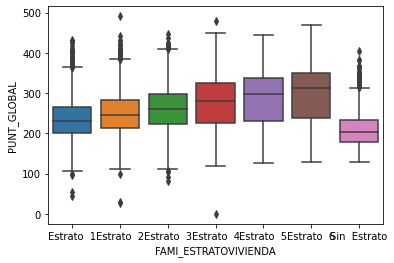

In [68]:
boxestrato = sns.boxplot(x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", 
                         data=datoscolfin,order=[
                             'Estrato  1','Estrato  2','Estrato  3','Estrato  4',
                             'Estrato  5','Estrato  6','Sin  Estrato'])

#### Comentario del autor: Estrato

Como se muestra en el resumen de estadisticas y gráficamente, aparentemente hay diferencia en el resultado obtenido de acuerdo al estrato socioeconomico, incluso se evidencia que a mayor estrato mejor puntaje en promedio.

,count,mean,std,min,25%,50%,75%,max
FAMI_TIENEINTERNET,,,,,,,,
No,18541.0,227.821261,43.559159,44.0,195.0,223.0,257.0,441.0
Si,36616.0,260.095996,51.791630,0.0,222.0,258.0,296.0,491.0


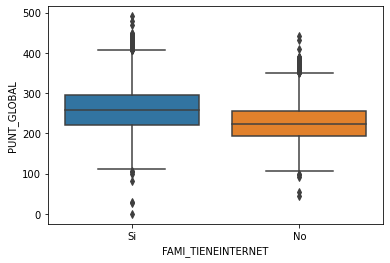

In [69]:
# Analisis Internet
boxinternet = sns.boxplot(x="FAMI_TIENEINTERNET", y="PUNT_GLOBAL", data=datoscolfin)
datoscolfin.groupby(['FAMI_TIENEINTERNET'])['PUNT_GLOBAL'].describe()

#### Comentario del autor: Internet

Como se muestra en el resumen de estadisticas y gráficamente, aparentemente hay diferencia en el resultado obtenido de acuerdo si la familia cuenta o no con acceso a internet, las personas que no tienen acceso a internet tienen un menor puntaje en la prueba, en promedio.

,count,mean,std,min,25%,50%,75%,max
ESTU_HORASSEMANATRABAJA,,,,,,,,
0,35543.0,257.657457,52.299769,0.0,218.0,255.0,294.0,491.0
Entre 11 y 20 horas,4898.0,234.203348,45.033401,112.0,199.0,232.0,267.0,392.0
Entre 21 y 30 horas,1969.0,234.310818,44.108754,125.0,201.0,233.0,265.0,412.0
Menos de 10 horas,10113.0,235.615445,47.930114,55.0,199.0,232.0,268.0,411.0
Más de 30 horas,2634.0,227.230448,42.648258,108.0,194.0,224.0,255.0,400.0


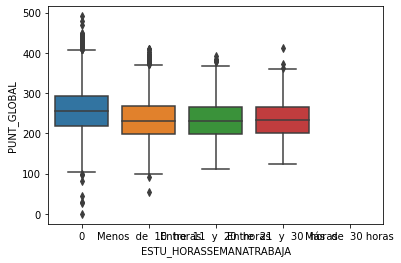

In [70]:
#Analisis dedicación laboral
boxtrabajo = sns.boxplot(x="ESTU_HORASSEMANATRABAJA", y="PUNT_GLOBAL", 
                         data=datoscolfin, 
                         order=['0', 'Menos  de  10  horas', 'Entre  11  y  20  horas',
                               'Entre  21  y  30  horas', 'Más  de  30 horas'])
datoscolfin.groupby(['ESTU_HORASSEMANATRABAJA'])['PUNT_GLOBAL'].describe()

#### Comentario del autor: Dedicación laboral

Como se muestra en el resumen de estadisticas y gráficamente, aparentemente hay diferencia en el resultado obtenido de acuerdo a si el estudiante labora o no, las personas que laboran tienen un menor desempeño en promedio que las que no laboran y más aún las que laboran más de 30 horas tienen un peor desempeño, vale la pena resaltar que con la base completa estas diferencias eran más marcadas.

,count,mean,std,min,25%,50%,75%,max
COLE_NATURALEZA,,,,,,,,
NO OFICIAL,14685.0,271.163500,57.859805,55.0,227.0,272.0,315.0,479.0
OFICIAL,40472.0,241.294549,46.482463,0.0,206.0,239.0,274.0,491.0


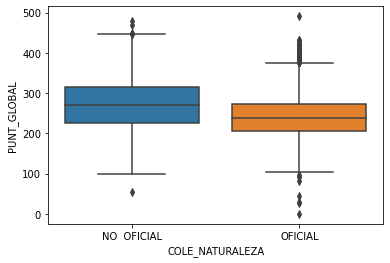

In [71]:
#Analisis naturaleza del colegio
boxnaturaleza = sns.boxplot(x="COLE_NATURALEZA", y="PUNT_GLOBAL", data=datoscolfin)
datoscolfin.groupby(['COLE_NATURALEZA'])['PUNT_GLOBAL'].describe()

#### Comentario del autor: Naturaleza de la institución educativa

Como se muestra en el resumen de estadisticas y gráficamente, aparentemente hay diferencia en el resultado obtenido de acuerdo a si el estudiante estudia en un colegio oficial o no oficial, las personas que estudian en un colegio oficial tienen un menor desempeño en promedio que las que estudian en una institución no oficial.

,count,mean,std,min,25%,50%,75%,max
COLE_JORNADA,,,,,,,,
COMPLETA,9512.0,282.155908,54.989944,0.0,241.0,284.0,324.0,479.0
MAÑANA,23831.0,247.493013,48.161584,28.0,212.0,245.0,280.0,491.0
NOCHE,2888.0,208.135388,38.534103,44.0,179.0,203.0,232.0,360.0
SABATINA,3465.0,207.426263,36.968260,93.0,181.0,203.0,230.0,373.0
TARDE,5477.0,245.040898,45.793134,123.0,211.0,243.0,277.0,441.0
UNICA,9984.0,250.793269,45.025118,112.0,217.0,250.0,282.0,431.0


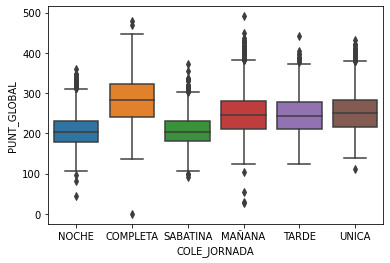

In [72]:
#Analisis jornada

boxjornada = sns.boxplot(x="COLE_JORNADA", y="PUNT_GLOBAL", data=datoscolfin)
datoscolfin.groupby(['COLE_JORNADA'])['PUNT_GLOBAL'].describe()

#### Comentario del autor: Jornada

Como se muestra en el resumen de estadisticas y gráficamente, aparentemente hay diferencia en el resultado obtenido de acuerdo a la jornada educativa, se evidencia un mejor desempeño en la prueba cuando la jornada es completa y un desempeño más bajo cuando es nocturna o sabatina, entre las jornadas tarde, mañana y unica no hay una diferencia significativa.

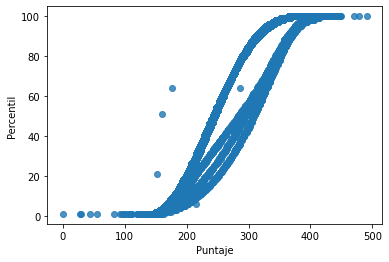

Correlación Pearson:  0.967627325950679


In [73]:
#Analisis correlación variables cuantitativas

fig, ax = plt.subplots()
ax.scatter(datoscolfin['PUNT_GLOBAL'],datoscolfin['PERCENTIL_GLOBAL'],alpha= 0.8, marker='o')
ax.set_xlabel('Puntaje')
ax.set_ylabel('Percentil')
plt.show()
print('Correlación Pearson: ', datoscolfin['PUNT_GLOBAL'].corr(datoscolfin['PERCENTIL_GLOBAL'], method='pearson'))


#### Comentario del autor: Correlaciones cuantitativas

Como era de esperarse, el percentil y el puntaje global obtenido estan altamente correlacionados, por lo que la variable a explicar elegida será el puntaje global.


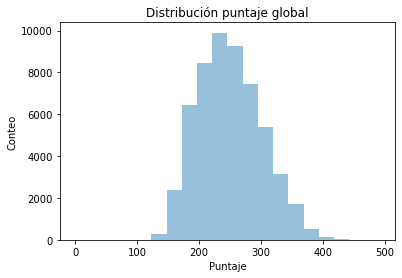

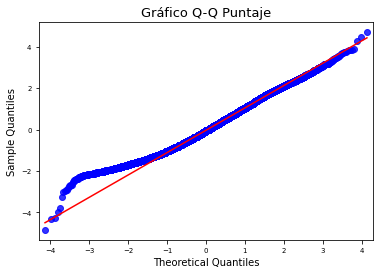

In [74]:
#Analisis grafico distribución variable dependiente puntaje global

fig, ax = plt.subplots()
ax.hist(x=datoscolfin['PUNT_GLOBAL'], bins=20, color="#3182bd", alpha=0.5)
#axs[0].plot(datos.height, np.full_like(datos.height, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución puntaje global')
ax.set_xlabel('Puntaje')
ax.set_ylabel('Conteo')

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

sm.qqplot(
    datoscolfin['PUNT_GLOBAL'],
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 1,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Puntaje', fontsize = 13)
ax.tick_params(labelsize = 7)

In [81]:
# Analisis de correlacion variables cualitativas
datoscolfin = datoscolfin.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

cramersv = am.CramersV(datoscolfin) 

cramersv.fit()

,ESTU_GENERO,PERIODO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_HORASSEMANATRABAJA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA
ESTU_GENERO,1.000000,0.022213,0.006119,0.027871,0.062934,0.033869,0.170157,0.047550,0.003370,0.017995
PERIODO,0.022213,1.000000,0.051253,0.275727,0.389969,0.123398,0.048557,0.357977,0.027109,0.197756
ESTU_TIENEETNIA,0.006119,0.051253,1.000000,0.444957,0.174405,0.157372,0.055847,0.125339,0.189013,0.102158
ESTU_DEPTO_RESIDE,0.027871,0.275727,0.444957,1.000000,0.158969,0.327366,0.077119,0.275993,0.252794,0.219210
FAMI_ESTRATOVIVIENDA,0.062934,0.389969,0.174405,0.158969,1.000000,0.406285,0.052942,0.389294,0.210413,0.142961
FAMI_TIENEINTERNET,0.033869,0.123398,0.157372,0.327366,0.406285,1.000000,0.150232,0.264784,0.274630,0.141356
ESTU_HORASSEMANATRABAJA,0.170157,0.048557,0.055847,0.077119,0.052942,0.150232,1.000000,0.092877,0.111352,0.119114
COLE_NATURALEZA,0.047550,0.357977,0.125339,0.275993,0.389294,0.264784,0.092877,1.000000,0.178272,0.516076
COLE_AREA_UBICACION,0.003370,0.027109,0.189013,0.252794,0.210413,0.274630,0.111352,0.178272,1.000000,0.113620
COLE_JORNADA,0.017995,0.197756,0.102158,0.219210,0.142961,0.141356,0.119114,0.516076,0.113620,1.000000


#### Comentario del autor: Correlaciones cualitativas

Se ha usado el estadistico V de Cramer para analizar las correlaciones de las variables cualitativas, teniendo en cuenta que toma valores entre 0 y 1 donde 0 indica independencia y 1 asociación perfecta.

Con lo anterior, se evidencia que las variables tienen una baja correlacion, rescatando que la unica combinación que genera una V de Cramer superior a 0.5 es la de la jornada del colegio con la naturaleza de este, obteniendo un valor de 0.516076.

#### Comentario del autor: Respuestas preguntas guía

##### ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?

Como se mostró en el desarrollo de la misión 2, todos los niveles de las variables elegidas parecen ser relevantes en la explicación del puntaje obtenido en la prueba. Sin embargo, su significancia estadistica se comprobará en la implementación del modelo de regresión más adelante.

##### ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
Como se mostró en el analisis de la variable estrato, las medidas de tendecia central varian de acuerdo a cada nivel, donde a mejor estrato mejor desempeño en la prueba. Sin embargo, su relevancia en la construcción de un modelo que estime el puntaje de acuerdo a distintas variables será testeado más adelante.

##### ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

Aparentemente todas las variables seleccionadas en la misión 1 pueden ser relevantes para explicar el desempeño  de los estudiantes en las pruebas de estado. Sin embargo, esto se probará con la implementación de un modelo de regresión.

#### Comentario del autor: 3 preguntas de analitica

1. ¿Es posible implementar un modelo de regresion lineal multiple que incluya variables sociodemograficas para explicar el desempeño de los estudiantes en las pruebas?

2. ¿Todas las variables seleccionadas explican con significancia estadistica el puntaje de los estudiantes en las pruebas?

3. ¿Cual es la bondad del modelo implementado?


# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

#### Comentario del autor: Pregunta guía seleccionada

Se va a abordar la pregunta si existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba, para esto, con ayuda del paquete `ols` de la libreria `statsmodels` se implementará un modelo de regresión multiple, donde las variables dependientes son todas categoricas. 



In [82]:
#Base de entrenamiento
datoscolfin_train=datoscolfin.sample(frac=0.80,random_state=18)


In [83]:
#Modelo sin departamento de residencia del estudiante


model = ols('PUNT_GLOBAL ~  C(ESTU_GENERO) +C(PERIODO)+C(ESTU_TIENEETNIA)+C(FAMI_ESTRATOVIVIENDA)+C(FAMI_TIENEINTERNET)+C(ESTU_HORASSEMANATRABAJA)+C(COLE_NATURALEZA)+C(COLE_AREA_UBICACION)+C(COLE_JORNADA)', data=datoscolfin_train)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     820.7
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:51:37   Log-Likelihood:            -2.2918e+05
No. Observations:               44126   AIC:                         4.584e+05
Df Residuals:                   44104   BIC:                         4.586e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               274.2731      1.340    204.695      0.000     271.647     276.899
C(ESTU_GENERO)[T.M]                                       7.9537      0.425     18.713      0.000       7.121       8.787
C(PERIODO)[T.2]                                         -18.1612      1.108    -16.393      0.000     -20.333     -15.990
C(ESTU_TIENEETNIA)[T.Si]                                -19.4586      0.876    -22.220      0.000     -21.175     -17.742
C(FAMI_ESTRATOVIVIENDA)[T.Estrato  2]                     2.3508      0.535      4.390      0.000       1.301       3.400
C(FAMI_ESTRATOVIVIENDA)[T.Estrato  3]                     5.5360      0.639      8.664      0.000       4.284       6.788
C(FAMI_ESTRATOVIVIENDA)[T.Estrato  4]                    10.7516      1.036     10.377      0.000       8.721      12.782
C(FAMI_ESTRATOVIVIENDA)[T.Estrato  5]                    15.5695      1.529     10.180      0.000      12.572      18.567
C(FAMI_ESTRATOVIVIENDA)[T.Estrato  6]                    18.0062      1.941      9.277      0.000      14.202      21.810
C(FAMI_ESTRATOVIVIENDA)[T.Sin  Estrato]                 -15.3096      1.246    -12.289      0.000     -17.751     -12.868
C(FAMI_TIENEINTERNET)[T.Si]                              14.9062      0.504     29.558      0.000      13.918      15.895
C(ESTU_HORASSEMANATRABAJA)[T.Entre  11  y  20  horas]   -14.3651      0.751    -19.123      0.000     -15.837     -12.893
C(ESTU_HORASSEMANATRABAJA)[T.Entre  21  y  30  horas]   -14.1640      1.147    -12.350      0.000     -16.412     -11.916
C(ESTU_HORASSEMANATRABAJA)[T.Menos  de  10  horas]      -12.8580      0.561    -22.904      0.000     -13.958     -11.758
C(ESTU_HORASSEMANATRABAJA)[T.Más  de  30  horas]        -13.3783      1.014    -13.188      0.000     -15.367     -11.390
C(COLE_NATURALEZA)[T.OFICIAL]                            -9.4814      0.616    -15.382      0.000     -10.690      -8.273
C(COLE_AREA_UBICACION)[T.URBANO]                         12.2114      0.620     19.687      0.000      10.996      13.427
C(COLE_JORNADA)[T.MAÑANA]                               -20.5545      0.667    -30.821      0.000     -21.862     -19.247
C(COLE_JORNADA)[T.NOCHE]                                -58.7806      1.088    -54.050      0.000     -60.912     -56.649
C(COLE_JORNADA)[T.SABATINA]                             -61.2619      1.006    -60.890      0.000     -63.234     -59.290
C(COLE_JORNADA)[T.TARDE]                                -24.6094      0.910    -27.035      0.000     -26.394     -22.825
C(COLE_JORNADA)[T.UNICA]                                -16.4871      0.801    -20.577      0.000     -18.058     -14.917
=================================

In [84]:
#Modelo con departamento de residencia del estudiante


model = ols('PUNT_GLOBAL ~ C(ESTU_DEPTO_RESIDE)+ C(ESTU_GENERO) +C(PERIODO)+C(ESTU_TIENEETNIA)+C(FAMI_ESTRATOVIVIENDA)+C(FAMI_TIENEINTERNET)+C(ESTU_HORASSEMANATRABAJA)+C(COLE_NATURALEZA)+C(COLE_AREA_UBICACION)+C(COLE_JORNADA)', data=datoscolfin_train)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     352.8
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:52:08   Log-Likelihood:            -2.2853e+05
No. Observations:               44126   AIC:                         4.572e+05
Df Residuals:                   44071   BIC:                         4.577e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               272.6280      5.314     51.300      0.000     262.212     283.044
C(ESTU_DEPTO_RESIDE)[T.ANTIOQUIA]                        -2.1626      5.184     -0.417      0.677     -12.323       7.998
C(ESTU_DEPTO_RESIDE)[T.ARAUCA]                           13.6660      5.830      2.344      0.019       2.238      25.094
C(ESTU_DEPTO_RESIDE)[T.ATLANTICO]                        -7.0828      5.225     -1.355      0.175     -17.325       3.159
C(ESTU_DEPTO_RESIDE)[T.BOGOTA]                            6.5834      5.185      1.270      0.204      -3.579      16.745
C(ESTU_DEPTO_RESIDE)[T.BOLIVAR]                         -10.2851      5.233     -1.965      0.049     -20.542      -0.028
C(ESTU_DEPTO_RESIDE)[T.BOYACA]                            9.8304      5.290      1.858      0.063      -0.537      20.198
C(ESTU_DEPTO_RESIDE)[T.CALDAS]                            2.1262      5.364      0.396      0.692      -8.388      12.640
C(ESTU_DEPTO_RESIDE)[T.CAQUETA]                           2.7919      5.652      0.494      0.621      -8.287      13.870
C(ESTU_DEPTO_RESIDE)[T.CASANARE]                         12.0987      5.516      2.193      0.028       1.286      22.911
C(ESTU_DEPTO_RESIDE)[T.CAUCA]                            -1.8206      5.304     -0.343      0.731     -12.216       8.575
C(ESTU_DEPTO_RESIDE)[T.CESAR]                            -1.9562      5.318     -0.368      0.713     -12.379       8.467
C(ESTU_DEPTO_RESIDE)[T.CHOCO]                           -15.7763      5.621     -2.807      0.005     -26.793      -4.760
C(ESTU_DEPTO_RESIDE)[T.CORDOBA]                          -0.4973      5.264     -0.094      0.925     -10.814       9.820
C(ESTU_DEPTO_RESIDE)[T.CUNDINAMARCA]                      4.9223      5.215      0.944      0.345      -5.300      15.144
C(ESTU_DEPTO_RESIDE)[T.EXTRANJERO]                        9.8391     22.128      0.445      0.657     -33.533      53.211
C(ESTU_DEPTO_RESIDE)[T.GUAINIA]                          -2.8788     10.027     -0.287      0.774     -22.531      16.774
C(ESTU_DEPTO_RESIDE)[T.GUAVIARE]                         -3.0122      7.442     -0.405      0.686     -17.598      11.574
C(ESTU_DEPTO_RESIDE)[T.HUILA]                             9.8718      5.329      1.853      0.064      -0.573      20.317
C(ESTU_DEPTO_RESIDE)[T.LA  GUAJIRA]                      -9.2088      5.408     -1.703      0.089     -19.809       1.391
C(ESTU_DEPTO_RESIDE)[T.MAGDALENA]                       -15.7916      5.291     -2.984      0.003     -26.163      -5.420
C(ESTU_DEPTO_RESIDE)[T.META]                              4.3550      5.328      0.817      0.414      -6.087      14.797
C(ESTU_DEPTO_RESIDE)[T.NARIÑO]   

#### Comentario del autor: Modelo seleccionado

Aunque el modelo que incluye el departamente de residencia del estudiante mejora el $R^2$ ajustando (0.301 vs 0.281), dentro de sus niveles existirían departamentos no significativos de acuerdo a las pruebas t individuales como por ejemplo Antioquia, ya que el intervalo de confianza del $β$ de este departamento incluiría el 0; en adición que al ser una variable con muchos niveles complica la interpretación de los resultados, por tanto se analizará el modelo sin esta variable.

El AIC y el BIC  no mejoran con la inclusión de la variable departamento de residencia.



#### Comentario del autor: Analisis desempeño modelo

* $R^2$ y $R^2$ ajustado: Ambos valores son de 0.281, indican que el 27.6% de la suma de cuadrados totales esta explicada por la suma de cuadrados de la regresión. Entre más cercano este valor este a 1, mejor es el desempeño del modelo. Podríamos concluir que el modelo tiene un bajo poder de predicción.

* $Prob (F-statistic)$: Según el resumen del modelo este valor es 0.00, lo que indica que no se puede rechazar la hipotesis nula de que todos los $β$ del modelo son 0, o en otras palabras indica que el modelo es significativo para explicar el puntaje de los estudiantes en la prueba.

* $Omnibus$: El valor de este estadistico es 197.27 y su p valor 0 lo que significa que el modelo actual funciona mejor que el modelo nulo. 

* $Skew$: Mide la asimetria para compararla con una distribución normal, cuya asimetria es 0. En este caso toma un valor de 0.143 que se puede considerar relativamente cerca del 0.

* $Kurtosis$: Mide la curtosis para compararla con una distribución normal, cuya curtosis es 3. En este caso toma un valor de 2.849 que se puede considerar relativamente cerca del 3.

* $Durbin-Watson$: Se utiliza para detectar la presencia de autocorrelación (una relación entre los valores separados el uno del otro por un intervalo de tiempo dado) en los residuos (errores de predicción) de un análisis de la regresión. El estadistico arroja un valor 1.996, esto significa que  los términos de error sucesivos están correlacionados negativamente.

* $Jarque-Bera$: La prueba de Jarque-Bera utiliza un estadístico de prueba que involucra la curtosis y la asimetría. Intenta resolver si “Los residuos tienen una distribución normal”,como Prob(JB)=0.00< 0.05 los residuos tienen una distribución normal.


#### Comentario del autor: Ejemplo de predicción

Suponga que se quiere estimar el puntaje para un estudiante hombre, que presenta el examen en el segundo semestre, que no pertenece a una etnia, de estrato 2, con internet, que trabaja menos de 10 horas a la semana, que estudia en un colegio oficial, en el casco urbano, en la jornada de la mañana.

$$puntaje_{estimado} = 274.2731 + 7.9537 - 18.1612 + 2.3508 + 14.9062 -12.8580 -9.4814 + 12.2114  -20.5545=250.6401$$

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [89]:
zona = widgets.Dropdown(
                        description = 'Departamento 1',
                        options = datoscolfin['ESTU_DEPTO_RESIDE'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )

zona1 = widgets.Dropdown(
                        description = 'Departamento 2',
                        options = datoscolfin['ESTU_DEPTO_RESIDE'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )

estrato = widgets.Dropdown(
                        description = 'Estrato',
                        options = datoscolfin['FAMI_ESTRATOVIVIENDA'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )

oficial = widgets.Dropdown(
                        description = 'Tipo de institución',
                        options = datoscolfin['COLE_NATURALEZA'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )

#Boxplot filtros

fig1 = go.FigureWidget(
                        data = go.Box(name = 'Puntaje'),  
    
                        layout = go.Layout(
                                            title = 'Puntaje pruebas saber 11 Departamento 1',
                                            xaxis_title = 'Puntaje',
                                    
                                          )
                     )


#Boxplot total
fig2 = go.FigureWidget(
                        data = go.Box(name = 'Puntaje'),  
    
                        layout = go.Layout(
                                            title = 'Puntaje pruebas saber 11 Departamento 2',
                                            xaxis_title = 'Puntaje',
                                    
                                          )
                     )





def filtrar():
    filtrar_lista1 = [i and j and k for i, j, k in zip(
                                                        datoscolfin['FAMI_ESTRATOVIVIENDA'] == estrato.value, 
                                                        datoscolfin['ESTU_DEPTO_RESIDE'] == zona.value,
                                                        datoscolfin['COLE_NATURALEZA'] == oficial.value
                                                     )
                    ]
    filtrar_lista2 = [i and j and k for i, j, k in zip(
                                                        datoscolfin['FAMI_ESTRATOVIVIENDA'] == estrato.value, 
                                                        datoscolfin['ESTU_DEPTO_RESIDE'] == zona1.value,
                                                        datoscolfin['COLE_NATURALEZA'] == oficial.value
                                                     )
                    ]
       
    df_temporal1 = datoscolfin[filtrar_lista1]
    df_temporal2 = datoscolfin[filtrar_lista2]
    fig1.data[0].x = df_temporal1['PUNT_GLOBAL'] # Establecemos los datos en el eje x.
    fig2.data[0].x = df_temporal2['PUNT_GLOBAL']

    

def respuesta(change):
    filtrar()
    
zona.observe(respuesta, names = 'value')
zona1.observe(respuesta, names = 'value')
estrato.observe(respuesta, names = 'value')
oficial.observe(respuesta, names = 'value')

filtrar()

parte_superior = widgets.HBox([zona,zona1])
parte_inferior=widgets.HBox([estrato, oficial])

visualizacion = widgets.VBox(
              [parte_superior,
               parte_inferior,
              fig1,fig2]
            )


display(visualizacion)

### Comentario del autor

#### Respuesta preguntas guía

##### ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?

¿Hay diferencias en los percentiles de los datos entre dos departamentos cuando su estrato y tipo de institución son las mismas?

Esta herramienta aporta al analisis en cuanto permite identificar si las politicas implentadas dentro de cada uno de los departamentos difiere teniendo en cuenta si la institución es oficial o no, así como el nivel socioeconomico del estudiante, el cual es reflejado en el estrato.

##### ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

Puede comparar departamentos desde su conocimiento del problema para identificar politicas publicas exitosas y replicarlas en departamentos donde el desempeño no sea tan exitoso.

